In [2]:
# Задание 1 — Модель склада (Periodic.gps)
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Начальные параметры
DAYS = 235
initial_stock = 1000
min_demand = 40
max_demand = 63
reorder_day = 5  # пятница (если неделя начинается с понедельника)
delivery_delay = 5  # 5 рабочих дней
target_stock = 1000
reorder_threshold = 800


In [4]:
# Логика модели склада
np.random.seed(42)

stock = initial_stock
stock_history = []
orders = []

for day in range(1, DAYS + 1):
    # Работаем только по будням
    if day % 7 in [6, 0]:  # суббота, воскресенье
        stock_history.append(stock)
        continue

    # Ежедневный спрос
    demand = np.random.randint(min_demand, max_demand + 1)
    stock -= demand
    stock_history.append(stock)

    # Пятничная инвентаризация
    if day % 7 == reorder_day:
        if stock < reorder_threshold:
            order_amount = target_stock - stock
            delivery_day = day + delivery_delay
            orders.append((delivery_day, order_amount))

    # Обработка поставок
    for delivery in orders[:]:
        if delivery[0] == day:
            stock += delivery[1]
            orders.remove(delivery)
np.random.seed(42)

stock = initial_stock
stock_history = []
orders = []

for day in range(1, DAYS + 1):
    # Работаем только по будням
    if day % 7 in [6, 0]:  # суббота, воскресенье
        stock_history.append(stock)
        continue

    # Ежедневный спрос
    demand = np.random.randint(min_demand, max_demand + 1)
    stock -= demand
    stock_history.append(stock)

    # Пятничная инвентаризация
    if day % 7 == reorder_day:
        if stock < reorder_threshold:
            order_amount = target_stock - stock
            delivery_day = day + delivery_delay
            orders.append((delivery_day, order_amount))

    # Обработка поставок
    for delivery in orders[:]:
        if delivery[0] == day:
            stock += delivery[1]
            orders.remove(delivery)


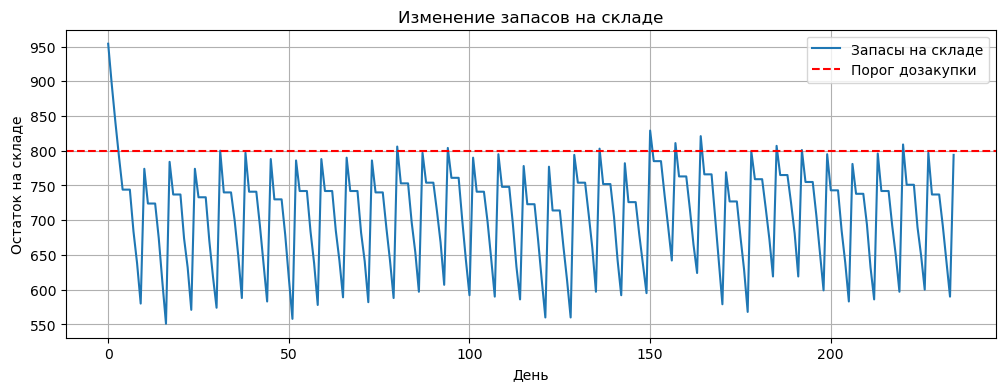

Количество дней с дефицитом: 0


In [5]:
# Построим график изменения запасов
plt.figure(figsize=(12, 4))
plt.plot(stock_history, label="Запасы на складе")
plt.axhline(reorder_threshold, color='r', linestyle='--', label="Порог дозакупки")
plt.title("Изменение запасов на складе")
plt.xlabel("День")
plt.ylabel("Остаток на складе")
plt.legend()
plt.grid(True)
plt.show()

# Проверим был ли дефицит
shortage_days = sum(s < 0 for s in stock_history)
print(f"Количество дней с дефицитом: {shortage_days}")


In [6]:
# Задание 2 — Модель магазина (SCHR4B.gps)
# Параметры покупок и отделов
# Константы
HOURS = 12
CUSTOMERS_PER_HOUR = 30
TOTAL_CUSTOMERS = HOURS * CUSTOMERS_PER_HOUR

# Вероятности посещения отделов
aisle_probs = [0.6, 0.4, 0.3]  # aisle1, aisle2, aisle3
# Среднее число покупок по отделам
mean_purchases = [5, 3, 2]


In [17]:
# Симуляция покупателей
np.random.seed(42)
all_purchases = []

for _ in range(TOTAL_CUSTOMERS):
    purchases = 0
    for prob, mean in zip(aisle_probs, mean_purchases):
        if np.random.rand() < prob:
            purchases += np.random.poisson(mean)
    all_purchases.append(purchases)


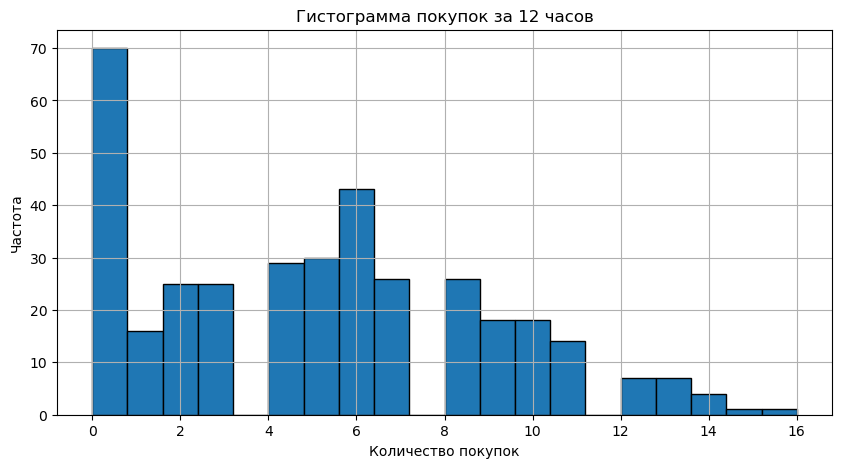

In [8]:
#Гистограмма

plt.figure(figsize=(10, 5))
plt.hist(all_purchases, bins=20, edgecolor='black')
plt.title("Гистограмма покупок за 12 часов")
plt.xlabel("Количество покупок")
plt.ylabel("Частота")
plt.grid(True)
plt.show()


In [9]:
# Задание 3 — Модель дистрибутора (Stockctl.gps)
# Параметры складо
days = 365
factory = {"stock": 3400, "threshold": 2100, "order_size": 2300}
branches = [
    {"stock": 430, "threshold": 240, "order_size": 115, "demand_mean": 64, "std": 24},
    {"stock": 600, "threshold": 430, "order_size": 165, "demand_mean": 128, "std": 32},
    {"stock": 1000, "threshold": 630, "order_size": 200, "demand_mean": 192, "std": 48},
]
delivery_time_factory = 20  # 4 недели
delivery_time_branch = 5


In [10]:
# Симуляция
np.random.seed(42)
factory_orders = []
branch_orders = [[] for _ in range(3)]
factory_history = []
branch_histories = [[] for _ in range(3)]

for day in range(1, days + 1):
    # Заказы филиалов
    for i, branch in enumerate(branches):
        demand = int(np.random.normal(branch["demand_mean"], branch["std"]))
        branch["stock"] -= max(demand, 0)
        branch_histories[i].append(branch["stock"])

        if branch["stock"] < branch["threshold"]:
            order_amount = branch["order_size"]
            delivery_day = day + delivery_time_branch
            branch_orders[i].append((delivery_day, order_amount))
            factory["stock"] -= order_amount

    # Поставка в филиалы
    for i, orders in enumerate(branch_orders):
        for o in orders[:]:
            if o[0] == day:
                branches[i]["stock"] += o[1]
                orders.remove(o)

    # Завод: поставка
    for order in factory_orders[:]:
        if order[0] == day:
            factory["stock"] += order[1]
            factory_orders.remove(order)

    # Завод: заказ
    if factory["stock"] < factory["threshold"]:
        factory_orders.append((day + delivery_time_factory, factory["order_size"]))

    factory_history.append(factory["stock"])


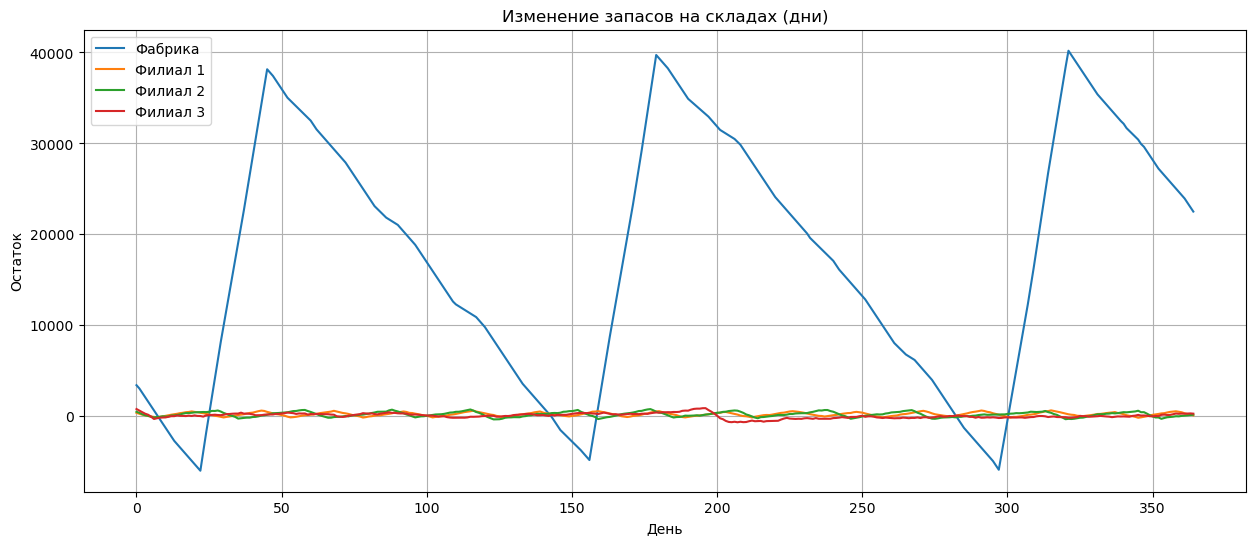

In [11]:
# Графики
plt.figure(figsize=(15, 6))
plt.plot(factory_history, label="Фабрика")
for i, hist in enumerate(branch_histories):
    plt.plot(hist, label=f"Филиал {i+1}")
plt.title("Изменение запасов на складах (дни)")
plt.xlabel("День")
plt.ylabel("Остаток")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Задание 4 — Создание собственной модели с использованием аналогов GPSS-объектов (STORAGE, QUEUE, DEPART, QTABLE)
# Вариант: Моделируем фабрику и 3 филиала, как в предыдущем задании, но теперь:

# каждый склад моделируется как Storage;

# заказы, ожидающие поставку, накапливаются в Queue;

# когда заказ уходит на поставку — Depart;

# статистику по длине очередей — QTable.

## Классы Storage, Queue, QTable

class Storage:
    def __init__(self, name, initial):
        self.name = name
        self.stock = initial
        self.history = []

    def add(self, amount):
        self.stock += amount

    def remove(self, amount):
        self.stock -= amount

    def record(self):
        self.history.append(self.stock)


class Queue:
    def __init__(self, name):
        self.name = name
        self.items = []

    def add(self, item):
        self.items.append(item)

    def remove(self):
        if self.items:
            return self.items.pop(0)

    def length(self):
        return len(self.items)


class QTable:
    def __init__(self, queue):
        self.queue = queue
        self.lengths = []

    def record(self):
        self.lengths.append(self.queue.length())


In [13]:
# Создание объектов склада, очереди, статистики
# Инициализация моделей

# Завод
factory = Storage("Фабрика", 3400)
factory_threshold = 2100
factory_order = 2300

# Филиалы
branch_params = [
    ("Филиал 1", 430, 240, 115, 64, 24),
    ("Филиал 2", 600, 430, 165, 128, 32),
    ("Филиал 3", 1000, 630, 200, 192, 48),
]
branches = [Storage(name, stock) for name, stock, *_ in branch_params]

queues = [Queue(name + " Очередь") for name, *_ in branch_params]
qtables = [QTable(q) for q in queues]


In [14]:
# Основной цикл моделирования
# Логика симуляции

np.random.seed(42)
days = 365
delivery_time = 5
factory_delivery_time = 20

branch_thresholds = [t for _, t, *_ in branch_params]
branch_orders = [o for *_, o, _, _ in branch_params]
branch_means = [m for *_, m, _ in branch_params]
branch_stds = [s for *_, _, s in branch_params]

factory_orders = []
branch_incoming = [[] for _ in range(3)]

for day in range(1, days + 1):
    # Обновление очередей
    for i in range(3):
        qtables[i].record()
        branches[i].record()
    factory.record()

    # Генерация спроса
    for i in range(3):
        demand = max(0, int(np.random.normal(branch_means[i], branch_stds[i])))
        branches[i].remove(demand)

        # Если ниже порога — формируем заказ
        if branches[i].stock < branch_thresholds[i]:
            queues[i].add((day, branch_orders[i]))
            factory.remove(branch_orders[i])
            delivery_day = day + delivery_time
            branch_incoming[i].append((delivery_day, branch_orders[i]))

    # Доставка на филиалы
    for i in range(3):
        for order in branch_incoming[i][:]:
            if order[0] == day:
                branches[i].add(order[1])
                branch_incoming[i].remove(order)
                queues[i].remove()  # DEPART

    # Заказ на завод
    if factory.stock < factory_threshold:
        factory_orders.append((day + factory_delivery_time, factory_order))

    # Поставка на завод
    for order in factory_orders[:]:
        if order[0] == day:
            factory.add(order[1])
            factory_orders.remove(order)


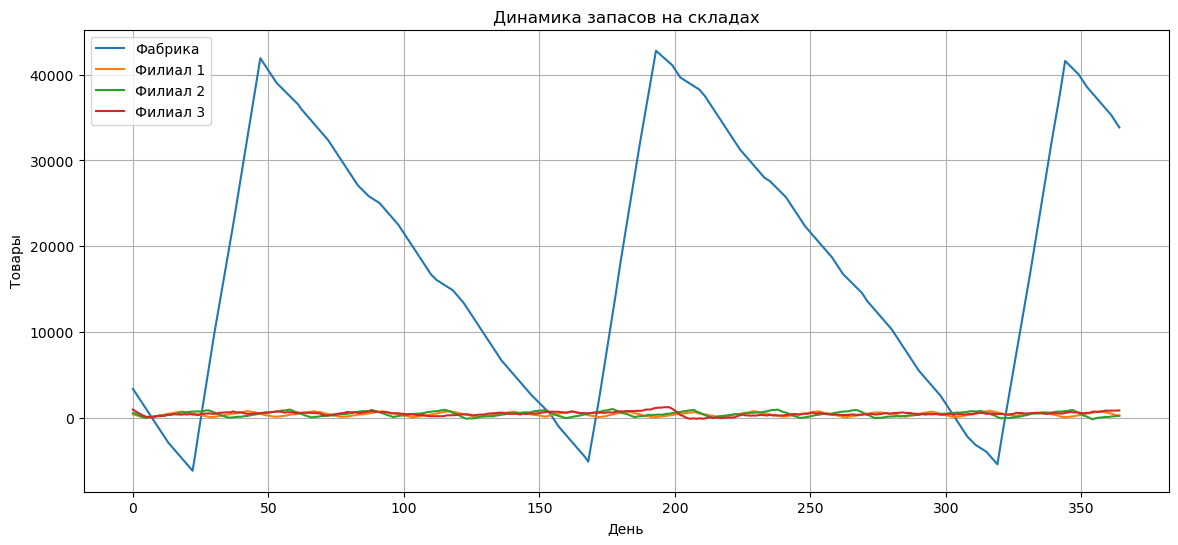

In [15]:
#  Визуализация результатов
# : Диаграммы складов

plt.figure(figsize=(14, 6))
plt.plot(factory.history, label="Фабрика")

for i, branch in enumerate(branches):
    plt.plot(branch.history, label=f"{branch.name}")

plt.title("Динамика запасов на складах")
plt.xlabel("День")
plt.ylabel("Товары")
plt.legend()
plt.grid(True)
plt.show()


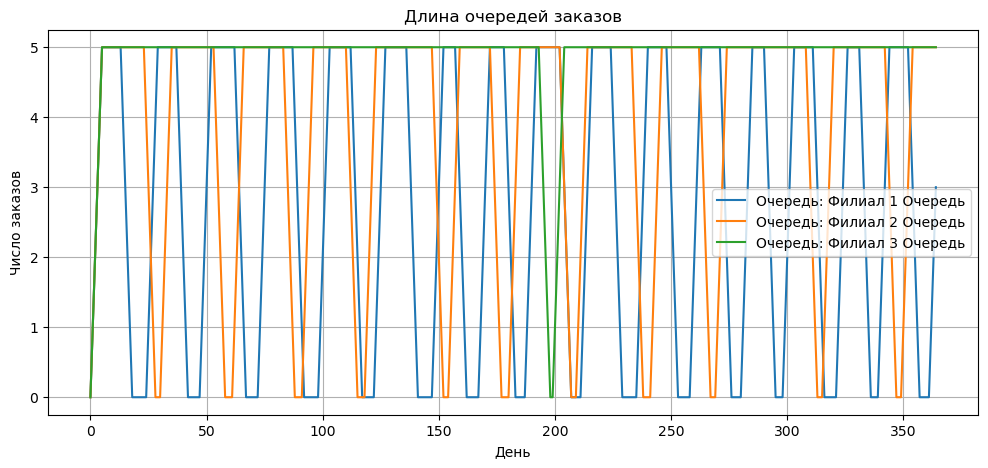

In [16]:
#  Очереди заказов (QTABLE)

plt.figure(figsize=(12, 5))
for i, q in enumerate(qtables):
    plt.plot(q.lengths, label=f"Очередь: {queues[i].name}")
plt.title("Длина очередей заказов")
plt.xlabel("День")
plt.ylabel("Число заказов")
plt.legend()
plt.grid(True)
plt.show()
